## 🔰*============ Summary Overview =============*🔰
  ### 🔑 To reduce training times **be sure that runtime is set to use GPU**
  #### &emsp; (menu) Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU
  * Useful resourse for understanding Convolutional Neural Networks: [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

### 📔***Notebook: 03a_CVandCNN_Intro***
  1. **Retrieve Dataset**
    * Data is a subset of the [Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) that include only images of Pizza & Steak
    * Link to this subset is provided by [Zero-to-Mastery](https://github.com/mrdbourke/tensorflow-deep-learning).
  2.  **Visualize the Dataset**
    * view 9 random images of steak
    * view 9 random images of pizza

  3. **Preprocess Dataset & Data Augmentation** 
    * use [TensorFlow ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)
    * Normalize data on interval (0,1)
    * Split data into a train, validation, and test sets
    * Using Data Augmentation to overcome overfitting training data.
    * *shear, zoom, shift, and flip*.

## 📔***Notebook: 03b_CVandCNN_Build Models***
  4. **Build Models**
    * Build a very simple NN using Dense Layers as reference
    * Build a simple CNN to compare performance
    * Build a a CNN using the **[Tiny VGG architecture](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)**
  

## 📔***Notebook: 03c_CVandCNN_Viualize_Layer_Outputs***
  5. **Visualize CNN Filter Patterns**
    * Render an image after processing through the first CNN Layer.
    * Show the resulting Convolution for each output filter.
    * Display original image along side for reference.

##[CNN Explained](https://colab.research.google.com/github/rojiark/DeepLearningWorkshop/blob/master/DeepLearningWorkshop.ipynb)

**Convolutional Neural Networks** (CNNs) function by applying a **process called [convolution](https://en.wikipedia.org/wiki/Kernel_(image_processing))**.
Convolution occurs when the pixel values in an image are substituted for new values determined by sampling each pixel's neighbors by applying a dot product with a filtering matrix known as a kernel. 


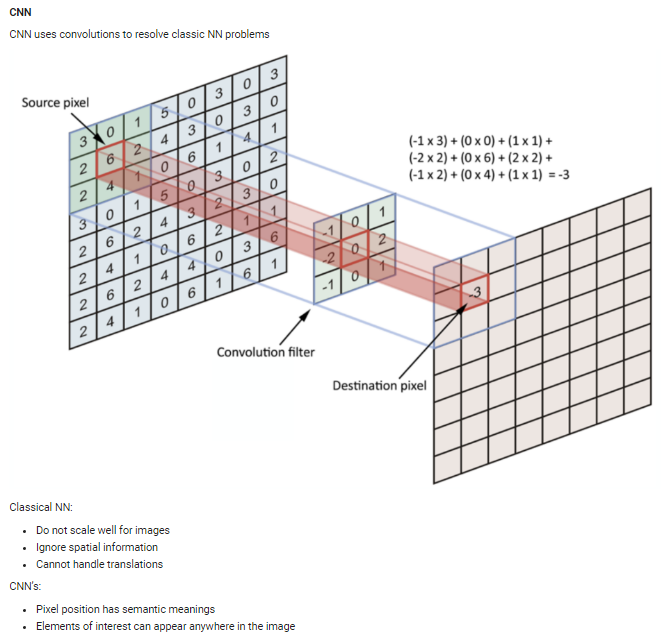

## [Max Pooling](https://www.researchgate.net/figure/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max_fig2_333593451)

Convolution is often paired with a process known as **pooling**, whereby the outputed convolution is reduced in size by taking subsets of the convolution and applying a summary statistic like max, or average. 

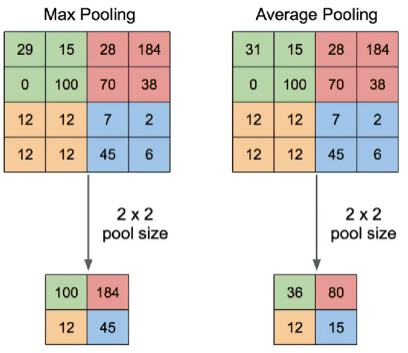

## 🔰*============ Getting Started =============*🔰
* imports and helper functions

In [ ]:
#--- imports needed for retrieving data
import zipfile
import os
import pathlib
import numpy as np

In [ ]:
#@title Helper Functions: unzip_files, count_files, get_class_names

def unzip_files(file_name):
  """
    Will unzip provided file.
  """
  #Unzip the downloaded file:
  zip_ref = zipfile.ZipFile(file_name)
  zip_ref.extractall()
  zip_ref.close()

def count_files(folder_name):
  """
    Displays to the user the number of files inside a folder.
  """
  #---- Review number of image files in folders:
  for dirpath, dirnames, filenames in os.walk(folder_name):
    nfiles = len(filenames)
    if nfiles:
      print(f'There are {nfiles} images in "{dirpath}".')

def get_class_names(folder_name):
  data_dir = pathlib.Path(folder_name)
  class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
  print(class_names)
  return class_names 

## 🔰*============ Retrieve data =============*🔰
  * download
  * unzip
  * count # of images
  * get class names

In [ ]:
#------ Download data in zip format from provided source:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-05-11 01:08:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  26.3MB/s    in 4.0s    

2022-05-11 01:08:18 (26.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#--- Unzip:
unzip_files("pizza_steak.zip")

In [ ]:
#---- Review number of image files in folders:
count_files('pizza_steak')

There are 250 images in "pizza_steak/test/steak".
There are 250 images in "pizza_steak/test/pizza".
There are 750 images in "pizza_steak/train/steak".
There are 750 images in "pizza_steak/train/pizza".


In [ ]:
class_names = get_class_names('pizza_steak/train')

['pizza' 'steak']


## 🔰*============ Visualize sample images =============*🔰
* display 9 random images from specified folder

In [ ]:
#@title Helper Functions: view_random_images
def _format_ax(ax,idx,shape):
    """
      helper function for displaying images
      hides axes ticks to reduce cluttering
    """
    #--- Format axes
    ax.set_title(f'shape: {shape}')

    #--- Keep Axes ticks along edges, delete others.
    if (idx % 3):
      ax.set_yticks([])
    if (idx < 6):
      ax.set_xticks([])

def _get_random_images(folder):
  print(f'target folder: {folder}')
  return rnd.choices(os.listdir(folder),k=9)

def _show_image(folder,file,subplot):
    """
      Handles displaying an image on a specified subplot
    """
    img = mpimg.imread(f'{folder}/{file}')
    ax = plt.subplot(subplot)
    ax.imshow(img)  
    return ax,img

def _format_fig(figure,class_name):
  """
    Formats subplots to reduce whitespace
  """
  figure.suptitle(f'Images of {class_name}',
                  fontsize=15,
                  y=1.0)
  figure.tight_layout(pad=2.10,
                      h_pad=1.10,
                      w_pad=0.25)

def view_random_class_images(target_dir,target_class):
  
  #Setup the target directory:
  target_folder = f'{target_dir}/{target_class}'

  #get 9 random image names:
  random_images = _get_random_images(target_folder)

  #Setup for showing images
  images = []                 #return a list of 9 images
  fig = plt.figure(figsize=(9,9))

  #Show random images
  for ax_idx, img_name in enumerate(random_images):

    ax,img = _show_image(folder=target_folder,
                         file=img_name,
                         subplot=331+ax_idx)
    #-Format:
    _format_ax(ax=ax,
               idx=ax_idx,
               shape=img.shape)
    
    #-Append image to list 
    images.append(img)
  
  #--- Add a Title
  _format_fig(figure=fig,
              class_name=target_class)
  
  return images

In [ ]:
#---- imports needed to visualize images:
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

target folder: pizza_steak/train/steak


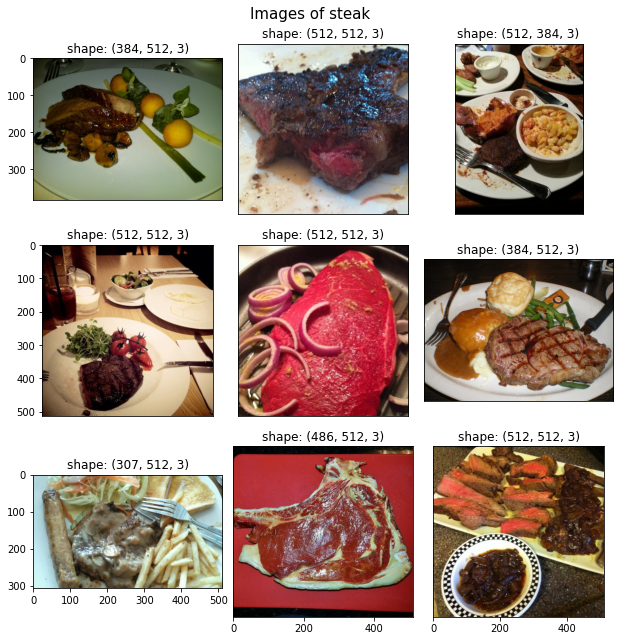

In [ ]:
images = view_random_class_images('pizza_steak/train',
                                  'steak')

target folder: pizza_steak/train/pizza


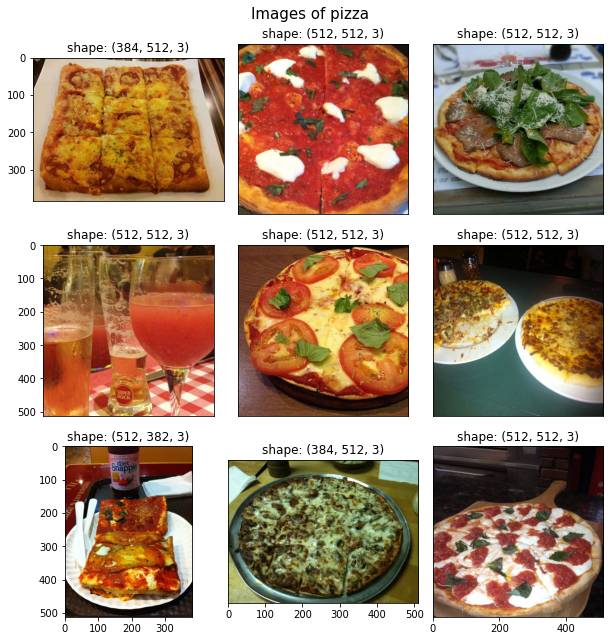

In [ ]:
images = view_random_class_images('pizza_steak/train',
                                  'pizza')

## 🔰*============ Preprocess Data =============*🔰
  * apply normalization on the interval (0,1)

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#---Set Random Seed:
tf.random.set_seed(321)

## 🔰*============ Data Augmentation =============*🔰
  * **Data Augmentation** serves to **reduce overfitting**, meaning the model is generalizing more effectively.
  * **Transforms (modifies) data** to produce **more variation** from which the model can learn from. 
  * TensorFlow's [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) provides this functionality through a number of [transforms](https://theailearner.com/2019/07/06/data-augmentation-with-keras-imagedatagenerator/):
      * rotation
      * shift: horizontal, vertical
      * brightness
      * shear
      * zoom
      * channel shift
      * flip: horizontal, vertical
      * custom function

  * Augmentation is normally **only applied on the training data**,<br>
    however there are circumstances that warrant **[Test Time Augmentation](https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d)** that may help improve predictions.

  * **validation set** augmentation helps to keep convergence of training & validation losses easier to interpret and more meaningful. 

In [ ]:
#@title Helper Functions: view_random_images
def _get_random_images(images,labels):
  batch_size = images.shape[0]
  random_indexes = rnd.sample(range(0,batch_size),k=9)
  r_imgs = images[random_indexes,...]
  r_labels = labels[random_indexes]
  return r_imgs,r_labels

def _show_image(image,subplot):
    """
      Handles displaying an image on a specified subplot
    """
    ax = plt.subplot(subplot)
    ax.imshow(image)  
    return ax

def _format_fig(figure):
  """
    Formats subplots to reduce whitespace
  """
  figure.suptitle(f'Images of Augmented Data',
                  fontsize=12,
                  y=0.99)
  figure.tight_layout(pad=2,
                      h_pad=0.90,
                      w_pad=0.25)

def _format_ax(ax,idx,label):
    """
      helper function for displaying images
      hides axes ticks to reduce cluttering
    """
    #--- Format axes
    text = 'Steak' if label else 'Pizza'
    ax.set_title(f'{text}')

    #--- Keep Axes ticks along edges, delete others.
    if (idx % 3):
      ax.set_yticks([])
    if (idx < 6):
      ax.set_xticks([])

def view_random_augmented_images(data):
  
  #Setup the target directory:
  target_data, target_labels = data.next()

  #get 9 random image names:
  images,labels = _get_random_images(target_data,target_labels)

  #Setup for showing images
  fig = plt.figure(figsize=(9,9))

  #Show random images
  for ax_idx, img in enumerate(zip(images,labels)):
    image, label = img
    ax = _show_image(image=image,
                     subplot=331 + ax_idx)
    #-Format:
    _format_ax(ax=ax,
               idx=ax_idx,
               label=label)
  
  #--- Add a Title
  _format_fig(figure=fig)

In [ ]:
#---Create ImageDataGenerator Instances:

#--Data should be augmented for training data, but not test data
train_IDG_aug = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range = 0.2,
                                   shear_range = 0.10,
                                   zoom_range = 0.10,
                                   width_shift_range=0.08,     
                                   height_shift_range=0.08,
                                   horizontal_flip=True,
                                   validation_split=0.20)



test_IDG_aug = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
#--- Set Global Variables
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 322
SHUFFLE = True

#--- Set path names:
train_folder = 'pizza_steak/train'
test_folder = 'pizza_steak/test'

train_data = train_IDG_aug.flow_from_directory(train_folder,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   shuffle=SHUFFLE,
                                                   subset='training',
                                                   seed=SEED)

valid_data = train_IDG_aug.flow_from_directory(train_folder,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary',
                                                   shuffle=SHUFFLE,
                                                   subset='validation',
                                                   seed= SEED + 1)

test_data = test_IDG_aug.flow_from_directory(test_folder,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='binary',
                                             shuffle=SHUFFLE,
                                             seed= SEED + 2)

Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


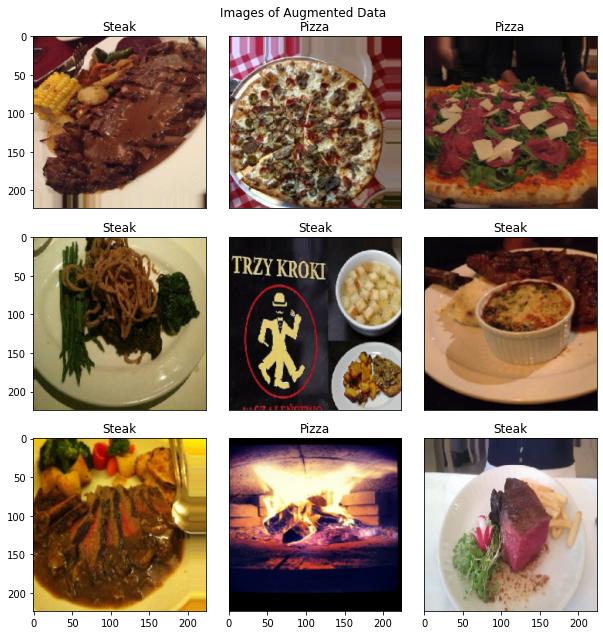

In [ ]:
view_random_augmented_images(train_data)

## 📔 Continue to notebook: [03b_CVandCNN_Build Models](https://github.com/delta2echo/tensorflow_portfolio/blob/main/03b_CVandCNN_Build_Models.ipynb)